# User Story 2
- User fills out the Blueprint with the PARAMS and executes several subfunctions of the experiment pipeline stepwise.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef and ElectricDevices.
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
import sys

#sys.path.append(os.path.abspath("src"))
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M


[2025-06-02 10:09:36] INFO - Custom-named logger active.
[2025-06-02 10:09:36] INFO - Custom-named logger active.


In [3]:
DATASET_NAME = "Adiac"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","p_vec":None, "random_seed":0,"start":0,"stop":40,"step":2} #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True                                           #Define if results should be saved

[2025-06-02 10:11:27] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-02 10:11:27] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-02 10:11:27] INFO - requested_instance_step = 7.8 will be transformed into 8
[2025-06-02 10:11:27] INFO - requested_percentage_step = 200 % || transformed into 2.0513 %
[2025-06-02 10:11:27] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '4' '5' '6' '7' '8' '9']
[2025-06-02 10:11:27] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-02 10:11:27] INFO - The p_vector for the current_experiment: [0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027]

X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)


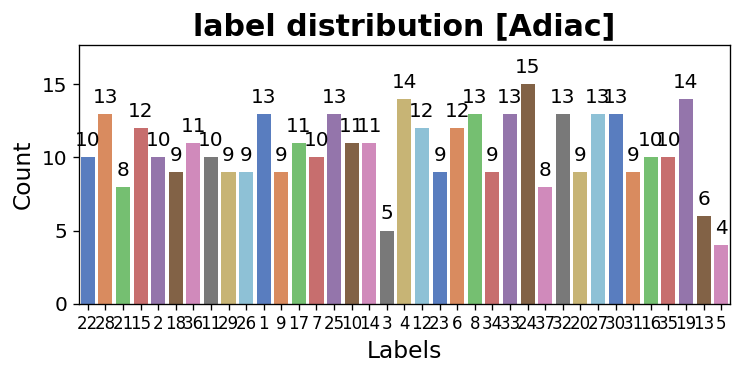

In [8]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name= CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

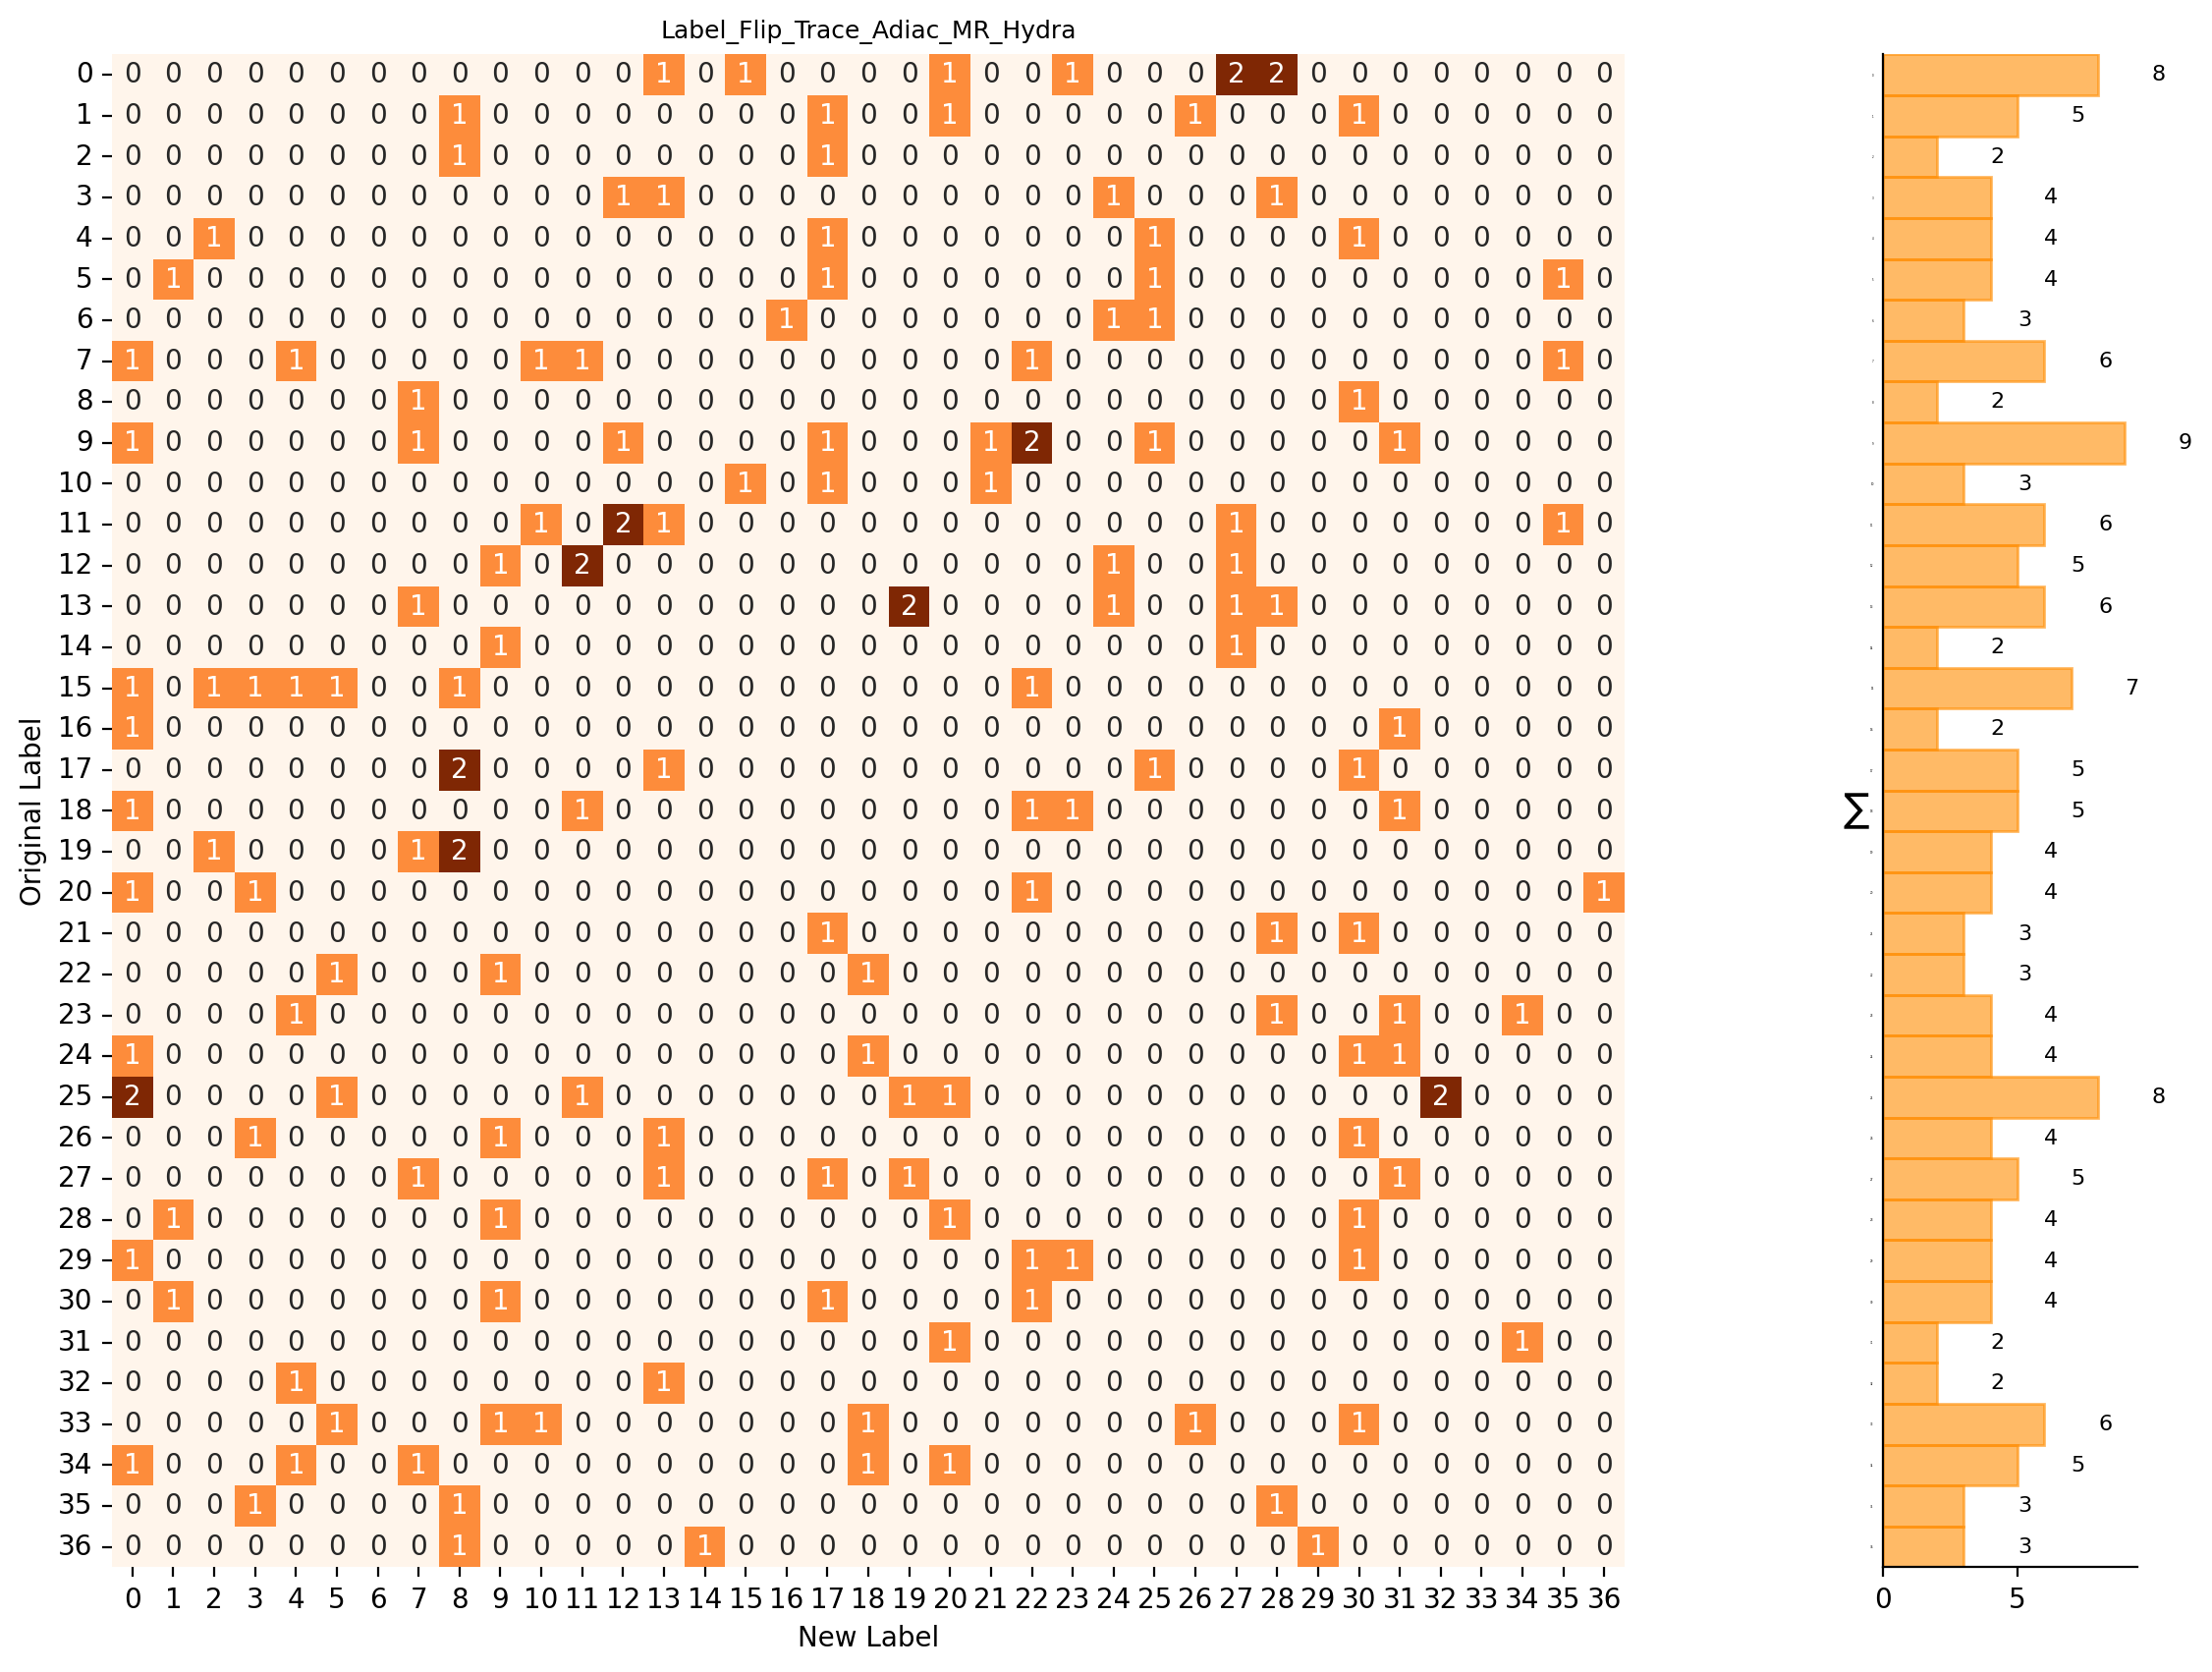

In [7]:
visualize_trace_M(trace_M_, cl_="MR_Hydra", ds_="Adiac", figsize=(20 ,10))

In [9]:
df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.000000,0.843990,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 34, 22, 16, 34, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
1,1,8,0.020512,0.841432,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 34, 22, 16, 34, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
2,2,16,0.041024,0.838875,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 34, 22, 16, 34, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
3,3,24,0.061536,0.831202,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 34, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
4,4,32,0.082048,0.826087,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
5,5,40,0.102560,0.826087,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 26...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
6,6,48,0.123072,0.815857,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 12...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
7,7,56,0.143584,0.792839,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 12...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
8,8,64,0.164096,0.782609,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 21, 29, 12...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
9,9,72,0.184608,0.769821,"[22, 28, 21, 15, 2, 18, 21, 36, 11, 23, 29, 12...","[16, 36, 31, 22, 16, 31, 24, 2, 30, 14, 24, 14...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."


In [10]:
DATASET_NAME = "ElectricDevices"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"                       #should be in cl_ names
REDUCTION_F = 10                                   #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      
DoE_PARAM = {"le_strategy": "leV1", "p_vec":None, "random_seed":1,"start":0,"stop":60,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                              #respect folder structure
SAVE_FILES = True 

[2025-06-02 10:13:16] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-02 10:13:16] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-02 10:13:16] INFO - requested_instance_step = 44.6 will be transformed into 45
[2025-06-02 10:13:16] INFO - requested_percentage_step = 500 % || transformed into 5.0448 %
[2025-06-02 10:13:16] INFO - label_names: ['1' '2' '3' '4' '5' '6' '7']
[2025-06-02 10:13:16] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-02 10:13:16] INFO - The p_vector for the current_experiment: [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429]
[2025-06-02 10:13:16] INFO - Searching inside simulation_results/MR-Hydra/ElectricDevices for results
[2025-06-02 10:13:16] INFO - Looking for files matching pattern: leV1_1_(\d+)_(\d+)_(\d+) with start=0, stop=540, step=45
[2025-06-02 10:13:16] INFO - 📁 Found directories: ['leV1_2_0_144_9', 'leV1_1_0_810_45', 'leV1_0_0_810_45', 'leV1_2_0_54_18', '

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)


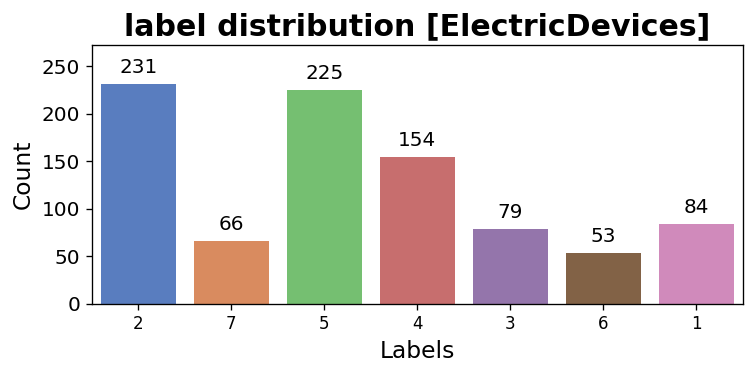

In [11]:
# Classifier MR-Hydra, Dataset ED 10%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name=CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_,  trace_m_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

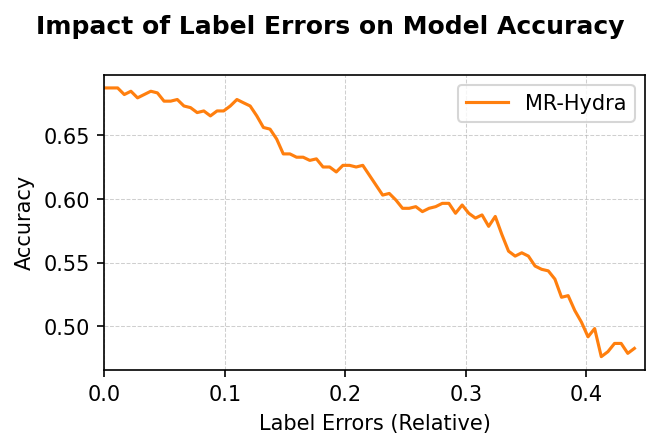

In [6]:
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, save_fig=True)

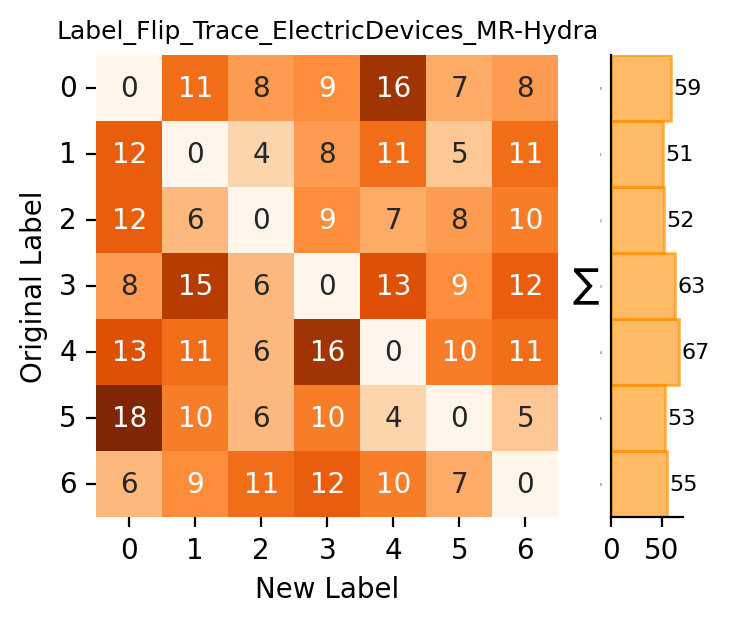

In [7]:
visualize_trace_M(trace_M=trace_m_, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, dpi=200, filename_="trace_M", save_fig=True)

In [ ]:
DATASET_NAME = "ElectricDevices"        #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 10                        #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","random_seed":1,"start":0,"stop":550,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True  


current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
